In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.random.rand(100,1)
X

array([[4.84706763e-01],
       [3.43243764e-01],
       [5.40102051e-03],
       [2.37225558e-01],
       [3.02772859e-01],
       [1.04797283e-01],
       [7.60013653e-01],
       [3.97574218e-01],
       [1.26032362e-02],
       [5.13799872e-01],
       [3.90083071e-02],
       [1.14669766e-01],
       [2.56176173e-01],
       [4.14200618e-01],
       [9.01567420e-02],
       [9.99522896e-01],
       [5.64736253e-01],
       [5.35496649e-01],
       [2.34261327e-01],
       [7.30841070e-01],
       [8.55108337e-01],
       [2.65152788e-01],
       [2.36552086e-01],
       [6.83927548e-01],
       [7.81412819e-01],
       [9.37841422e-01],
       [9.88684403e-01],
       [3.38468976e-01],
       [6.02381339e-01],
       [3.14624298e-01],
       [2.51154644e-01],
       [2.09033458e-01],
       [5.34218777e-01],
       [4.31536376e-01],
       [7.06173846e-01],
       [8.28052253e-01],
       [1.27826216e-01],
       [9.90891161e-02],
       [8.60251869e-01],
       [3.61765174e-01],


In [3]:
y = 4 + 3*X + np.random.randn(100,1)

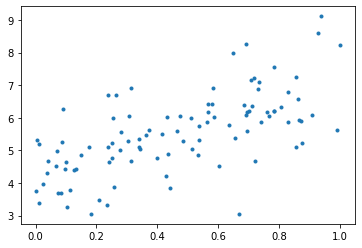

In [4]:
plt.plot(X,y,'.')

In [7]:
X_b = np.c_[np.ones((100,1)),X] #add x0 = 1 to each instance
X_b

array([[1.00000000e+00, 4.84706763e-01],
       [1.00000000e+00, 3.43243764e-01],
       [1.00000000e+00, 5.40102051e-03],
       [1.00000000e+00, 2.37225558e-01],
       [1.00000000e+00, 3.02772859e-01],
       [1.00000000e+00, 1.04797283e-01],
       [1.00000000e+00, 7.60013653e-01],
       [1.00000000e+00, 3.97574218e-01],
       [1.00000000e+00, 1.26032362e-02],
       [1.00000000e+00, 5.13799872e-01],
       [1.00000000e+00, 3.90083071e-02],
       [1.00000000e+00, 1.14669766e-01],
       [1.00000000e+00, 2.56176173e-01],
       [1.00000000e+00, 4.14200618e-01],
       [1.00000000e+00, 9.01567420e-02],
       [1.00000000e+00, 9.99522896e-01],
       [1.00000000e+00, 5.64736253e-01],
       [1.00000000e+00, 5.35496649e-01],
       [1.00000000e+00, 2.34261327e-01],
       [1.00000000e+00, 7.30841070e-01],
       [1.00000000e+00, 8.55108337e-01],
       [1.00000000e+00, 2.65152788e-01],
       [1.00000000e+00, 2.36552086e-01],
       [1.00000000e+00, 6.83927548e-01],
       [1.000000

In [73]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [74]:
theta_best

array([[4.17895813],
       [2.73622788]])

We would have expected 0o = 4 and 01(Theta 1) = 3 instead of above values as we have the Gaussian Noise which made it impossible to recover the exact parameters.

In [75]:
X_new = np.array([[0],[2]])

In [76]:
X_new_b = np.c_[np.ones((2,1)),X_new] 

In [77]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [78]:
y_predict = X_new_b.dot(theta_best)

In [79]:
y_predict

array([[4.17895813],
       [9.65141389]])

[0, 2, 0, 15]

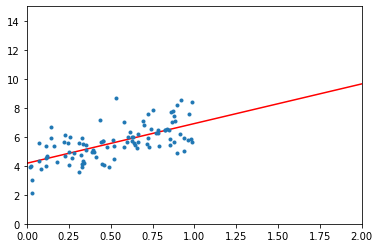

In [80]:
plt.plot(X_new,y_predict,'r')
plt.plot(X,y,'.')
plt.axis([0,2,0,15])

The Equivalent code using scikit-learn looks like this:

In [81]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.17895813]), array([[2.73622788]]))

In [82]:
lin_reg.predict(X_new)

array([[4.17895813],
       [9.65141389]])

#Gradient Descent

In [83]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [84]:
for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients

In [85]:
theta

array([[4.1789553 ],
       [2.73623293]])

Hey,thats exactly what the normal equation found!Gradient woked perfectly.But what if the learning rate is different for very less values it will take more time and for very high values it will diverge and go out of our bound thats the reason i have chosen moderate value of 0.1